To install the Louvain method:

pip install python-louvain

https://github.com/taynaud/python-louvain
https://python-louvain.readthedocs.io/en/latest/

1. Load Matlab HMM output matrices (FO between-subject correlations, state transition probability)

In [1]:
import scipy.io
file='/Users/kosciessa/OHBM18/A_BrainHack/HMM_complete/B_data/C_matricesForKmeans.mat'
data = scipy.io.loadmat(file) # contains 'RMat' and 'transitionProbabilities'

First, let's plot the data

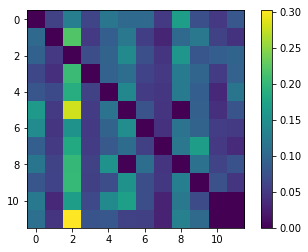

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(data['transitionProbabilities']);
plt.colorbar()
plt.show()

No obvious clustering here.

But let's continue ...

Turn Transition probability matrix into graph

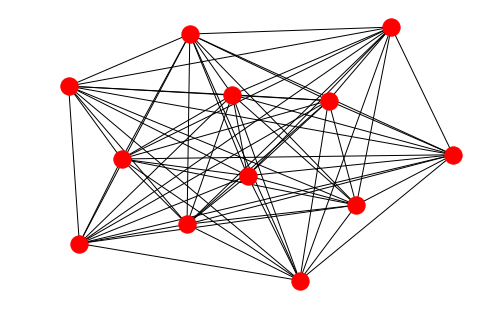

In [3]:
import numpy
import matplotlib.pyplot as plt
import networkx as nx
G=nx.from_numpy_matrix(data['transitionProbabilities'])
nx.draw(G)

Now use Louvain community detection to find communities from transition probabilities

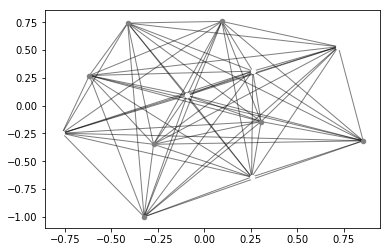

In [5]:
import community
import matplotlib.pyplot as plt

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Not a very clear community structure here ...

Now let's try the other method of using between-subject correlations of fractional occupancies.
The assumption is that individuals differ in their proportional engagement of metastates.
To try to replicate Vidaurre et al. (2017), we use Ward's algorithm.

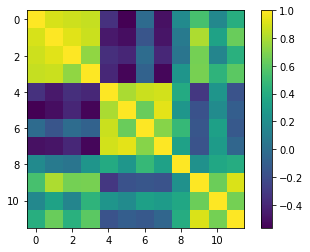

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(data['RMat']);
plt.colorbar()
plt.show()

Now this looks as if there are actually 3 metastates.

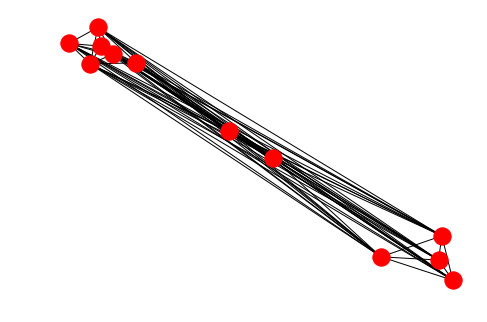

In [7]:
import numpy
import matplotlib.pyplot as plt
G=nx.from_numpy_matrix(data['RMat'])
nx.draw(G)

This is also true if we look at the graph representation. Although we now see a somewhat continuous appearance.

It's interesting that the between-person differences in 'meta-state' engagement is what derives the states here. The separation is also clearer in Vidaurre et al. (2017) for the FO-correlations compared with the transition probabilities.